In [51]:
from astropy.table import Table
from desitarget.sv1.sv1_targetmask import scnd_mask
from desitarget.sv1.sv1_targetmask import desi_mask

import glob
import numpy as np
from collections import Counter, OrderedDict
import sys
import matplotlib.pyplot as plt


#flavors ["sv1elg", "sv1elgqso","sv1lrgqso","sv1bgsmws"]
flavor = "sv1bgsmws"
priority = "custom"
fiber = "restricted"
scnd = "true"

fba_files = glob.glob("tiles_sv1_scnd/{}_{}_scnd_{}_fiber_{}*/fiberassign-*.fits.gz".format(flavor, priority, scnd, fiber))
fba_files.sort()
print(len(fba_files))

scnd_targets = {}
names = [n for n in scnd_mask.names()]  

for n in names:
    scnd_targets[n] = {}
    scnd_targets[n]['n_intile_main'] = []
    scnd_targets[n]['n_intile_scnd'] = []
    scnd_targets[n]['n_avail'] = []
    scnd_targets[n]['n_assign'] = []

106


In [52]:
n = 100
missed_targets = np.zeros(n)
n_targets_true = np.zeros(n)
for i in range(n):
    scnd_target_files = fba_files[i].replace('fiberassign-', '/')
    scnd_target_files = scnd_target_files.replace('.fits.gz', '-scnd.fits')
    scnd_all_targets = Table.read(scnd_target_files)
    masks_scnd_tile = scnd_all_targets['SV1_SCND_TARGET']
    
    main_target_files = scnd_target_files.replace('scnd.fits', 'targ.fits')
    main_all_targets  = Table.read(main_target_files)
    masks_main_tile = main_all_targets['SV1_SCND_TARGET']
    
    flavor = fba_files[i].split('/')[1].split('_')[0]
    scnd = fba_files[i].split('/')[1].split('_')[3]
    targetid = fba_files[i].split('/')[1].split('_')[-1]
    fba_file_false_scnd = fba_files[i].replace('true', 'false')
    data = Table.read(fba_files[i], hdu='FIBERASSIGN')
    data_false = Table.read(fba_file_false_scnd, hdu='FIBERASSIGN') 
    
    tgt_data = data[data['FA_TYPE']==1]
    tgt_data_false = data_false[data_false['FA_TYPE']==1]
    setid = set(tgt_data['TARGETID'])
    setid_false = set(tgt_data_false['TARGETID'])
    z = setid.intersection(setid_false)
    missed_targets[i] = len(setid) - len(z)
    n_targets_true[i] = len(setid)
    print(missed_targets[i], n_targets_true[i])
    
    
    
    pot = Table.read(fba_files[i], hdu='POTENTIAL_ASSIGNMENTS')
    targets = Table.read(fba_files[i], hdu='TARGETS')
    
    masks_assigned = data['SV1_SCND_TARGET'][data['SV1_SCND_TARGET']!=0]
    targetid_assigned = data['TARGETID'][data['SV1_SCND_TARGET']!=0]
    
    masks_targets = targets['SV1_SCND_TARGET'][targets['SV1_SCND_TARGET']!=0]
    targetid_targets = targets['TARGETID'][targets['SV1_SCND_TARGET']!=0]
    
    ii_pot = np.in1d(targetid_targets, pot['TARGETID'])
    masks_potential = masks_targets[ii_pot]
    targetid_potential = targetid_targets[ii_pot]
    #print(len(targetid_targets), len(targetid_potential), len(targetid_assigned))
    for n in names:
        ii_avail = (masks_potential & scnd_mask.mask(n))!=0
        ii_assigned = (masks_assigned & scnd_mask.mask(n))!=0
        ii_intile_scnd = (masks_scnd_tile & scnd_mask.mask(n))!=0
        ii_intile_main = (masks_main_tile & scnd_mask.mask(n))!=0
        n_intile_main = np.count_nonzero(ii_intile_main)
        n_intile_scnd = np.count_nonzero(ii_intile_scnd)
        n_avail = np.count_nonzero(ii_avail)
        n_assigned = np.count_nonzero(ii_assigned)
        scnd_targets[n]['n_intile_main'].append(n_intile_main)
        scnd_targets[n]['n_intile_scnd'].append(n_intile_scnd)
        scnd_targets[n]['n_avail'].append(n_avail)
        scnd_targets[n]['n_assign'].append(n_assigned)
        #print(n, n_avail, n_assigned)
    #print(flavor, targetid, n_scnd)

66.0 3939.0
57.0 3882.0
0.0 4055.0
0.0 4076.0
11.0 4004.0
15.0 4000.0
7.0 3992.0
0.0 3972.0
0.0 4055.0
99.0 3973.0
55.0 3911.0
35.0 4017.0
52.0 3980.0
93.0 4033.0
10.0 4015.0
10.0 4015.0
7.0 4025.0
16.0 3953.0
20.0 3879.0
15.0 4001.0
57.0 3977.0
41.0 4075.0
61.0 4022.0
24.0 3856.0
55.0 3900.0
34.0 3977.0
24.0 3869.0
17.0 3842.0
33.0 3930.0
15.0 3767.0
0.0 4029.0
55.0 3855.0
1.0 3959.0
0.0 3861.0
0.0 3799.0
1.0 3849.0
0.0 3826.0
20.0 3883.0
26.0 3802.0
45.0 4062.0
18.0 4003.0
0.0 3799.0
32.0 3989.0
20.0 4000.0
0.0 4055.0
15.0 3952.0
39.0 3797.0
11.0 3868.0
17.0 3915.0
0.0 4061.0
24.0 3901.0
13.0 3864.0
63.0 3724.0
15.0 3773.0
44.0 3824.0
31.0 3766.0
54.0 3926.0
64.0 3875.0
9.0 3769.0
5.0 3853.0
12.0 3813.0
27.0 3956.0
35.0 3982.0
52.0 3832.0
29.0 3917.0
1.0 3959.0
0.0 3800.0
1.0 3797.0
1.0 3849.0
0.0 3839.0
1.0 3825.0
0.0 3847.0
57.0 4054.0
16.0 4075.0
31.0 3918.0
18.0 4003.0
26.0 3802.0
20.0 3800.0
46.0 4067.0
33.0 4052.0
27.0 3926.0
17.0 3969.0
14.0 4026.0
20.0 4000.0
20.0 4000.0
23.0

(array([26.,  5.,  8., 15., 11.,  5.,  6.,  3.,  2.,  3.,  3.,  6.,  4.,
         1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <a list of 20 Patch objects>)

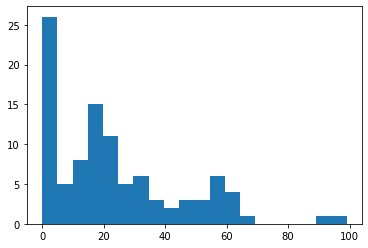

In [53]:
plt.hist(missed_targets, bins=20)

(array([33., 21., 16.,  8.,  6.,  9.,  5.,  0.,  0.,  2.]),
 array([0.        , 0.24918198, 0.49836396, 0.74754594, 0.99672791,
        1.24590989, 1.49509187, 1.74427385, 1.99345583, 2.24263781,
        2.49181978]),
 <a list of 10 Patch objects>)

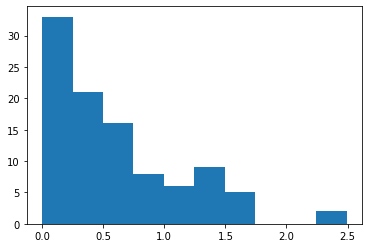

In [54]:
plt.hist(100*missed_targets/n_targets_true)

In [55]:
np.mean(missed_targets), np.std(missed_targets)

(22.81, 21.938411519524376)

In [56]:
np.mean(n_targets_true), np.std(n_targets_true)

(3920.59, 104.02673646712175)

In [57]:
100*np.mean(missed_targets/n_targets_true), 100*np.std(missed_targets/n_targets_true)

(0.5812581322690634, 0.5569845325807361)

In [50]:
150/4000

0.0375